In [1]:
import os
import cv2  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from keras import layers
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import tensorflow as tf
from keras.preprocessing import image
from keras import backend as K

# Reference

URL 1: https://www.datacamp.com/tutorial/fingerprint-deep-learning

# Predpripraveni datasetu

In [2]:
# FVC2002 dataset path
dataset_path_list = ['./dataset/Db3_b']

# funkce pro extrakci info o otisku z jeho nazvu
def extract_info_from_filename(filename):
    parts = filename.split('_')
    finger_number = int(parts[0])
    variant_number = int(parts[1].split('.')[0])
    return finger_number, variant_number

# nacte souboru z datasetu do pole a priradi jim label
data = []
labels = []
for dataset_path in dataset_path_list:
    for filename in os.listdir(dataset_path):
        if filename.endswith('.tif'):
            # nacte obrazek
            img_path = os.path.join(dataset_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (300, 300))

            # ziskani informaci o obrazku z jeho nazvu
            finger_number, variant_number = extract_info_from_filename(os.path.basename(filename))

            # otisku priradi jejich label
            data.append(img)
            labels.append(f"Finger_{finger_number}")
            print("lable: " + str(f"Finger_{finger_number}") + " : " + str(img_path))

# prevede list na np list a normalizace obrazku
data = np.array(data)
data = np.array(data, dtype=np.float32) / 255.0
labels = np.array(labels)

lable: Finger_101 : ./dataset/Db3_b\101_1.tif
lable: Finger_101 : ./dataset/Db3_b\101_2.tif
lable: Finger_101 : ./dataset/Db3_b\101_3.tif
lable: Finger_101 : ./dataset/Db3_b\101_4.tif
lable: Finger_101 : ./dataset/Db3_b\101_5.tif
lable: Finger_101 : ./dataset/Db3_b\101_6.tif
lable: Finger_101 : ./dataset/Db3_b\101_7.tif
lable: Finger_101 : ./dataset/Db3_b\101_8.tif
lable: Finger_102 : ./dataset/Db3_b\102_1.tif
lable: Finger_102 : ./dataset/Db3_b\102_2.tif
lable: Finger_102 : ./dataset/Db3_b\102_3.tif
lable: Finger_102 : ./dataset/Db3_b\102_4.tif
lable: Finger_102 : ./dataset/Db3_b\102_5.tif
lable: Finger_102 : ./dataset/Db3_b\102_6.tif
lable: Finger_102 : ./dataset/Db3_b\102_7.tif
lable: Finger_102 : ./dataset/Db3_b\102_8.tif
lable: Finger_103 : ./dataset/Db3_b\103_1.tif
lable: Finger_103 : ./dataset/Db3_b\103_2.tif
lable: Finger_103 : ./dataset/Db3_b\103_3.tif
lable: Finger_103 : ./dataset/Db3_b\103_4.tif
lable: Finger_103 : ./dataset/Db3_b\103_5.tif
lable: Finger_103 : ./dataset/Db3_

# Vytvoreni trenovaci a validacni sady

In [3]:
# prevede label na ciselne hodnoty
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(np.unique(encoded_labels))

# rozdeli dataset na trenovaci a testovaci
X_train, X_val, y_train, y_val = train_test_split(data, encoded_labels, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

# vypis info
print("Shape of X train set: " + str(X_train.shape))
print("Shape of Y train set: " + str(y_train.shape))
print("")
print("Shape of X test set: " + str(X_val.shape))
print("Shape of Y test set: " + str(y_val.shape))
print("")
print("Class count: " + str(num_classes))

Shape of X train set: (64, 300, 300, 1)
Shape of Y train set: (64, 10)

Shape of X test set: (16, 300, 300, 1)
Shape of Y test set: (16, 10)

Class count: 10


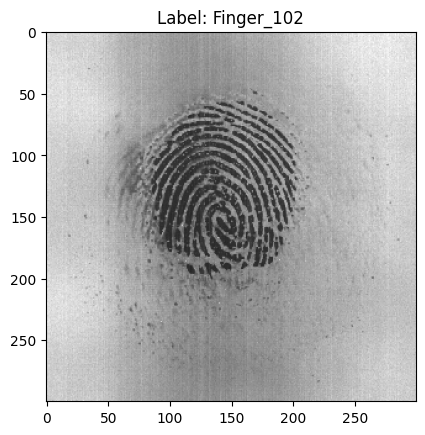

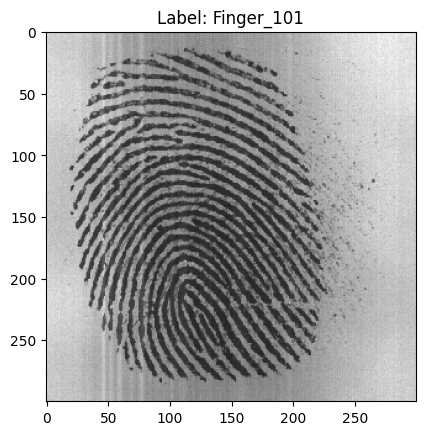

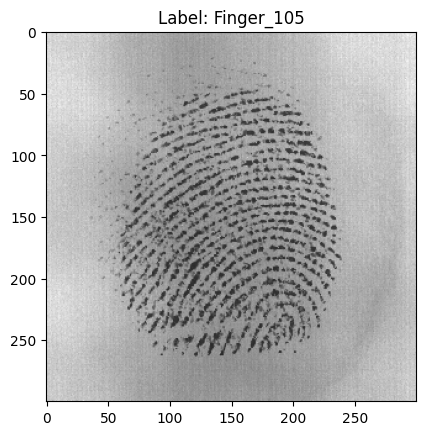

In [6]:
import random

# Nastavíme náhodný seed pro reprodukovatelnost
random.seed(42)

# Počet obrázků, které chceš zobrazit
num_images_to_display = 3

# Seznam indexů náhodně vybraných obrázků
random_indices = random.sample(range(len(X_train)), num_images_to_display)

# Zobrazení náhodně vybraných obrázků z trénovací sady
for idx in random_indices:
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f"Label: {labels[idx]}")  # Předpokládáme, že labels jsou stále k dispozici
    plt.show()

# Model CNN pro klasifikaci otisku prstu

In [4]:
# vytvoreni modelu CNN
model = keras.Sequential()

# konvolucni vrstvy
model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), input_shape=(300, 300, 1)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), strides=(1, 1)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), strides=(1, 1)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# plne propojene vrstvy
model.add(layers.Flatten())
model.add(layers.Dense(2048))
model.add(layers.Activation('relu'))

model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))

model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 64)      640       
                                                                 
 activation (Activation)     (None, 298, 298, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 128)     73856     
                                                                 
 activation_1 (Activation)   (None, 146, 146, 128)     0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 72, 72, 128)       0         
 g2D)                                                 

c:\Users\Martin Krcma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\layer_utils.py:146: RuntimeWarning: overflow encountered in scalar multiply
  total_memory_size += weight_shape * per_param_size


# Uceni modelu

In [6]:
# trenovani modelu
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))
model.save_weights('fingerprint_model.h5') 

Epoch 1/30


2/2 [==============================] - 16s 7s/step - loss: 15.6184 - accuracy: 0.0781 - val_loss: 14.3617 - val_accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 14s 7s/step - loss: 8.0784 - accuracy: 0.1250 - val_loss: 2.3542 - val_accuracy: 0.1250
Epoch 3/30
2/2 [==============================] - 13s 7s/step - loss: 2.6614 - accuracy: 0.0469 - val_loss: 2.3230 - val_accuracy: 0.0625
Epoch 4/30
2/2 [==============================] - 13s 7s/step - loss: 2.4771 - accuracy: 0.1719 - val_loss: 2.4667 - val_accuracy: 0.0625
Epoch 5/30
2/2 [==============================] - 13s 7s/step - loss: 2.3616 - accuracy: 0.0781 - val_loss: 2.3364 - val_accuracy: 0.0000e+00
Epoch 6/30
2/2 [==============================] - 13s 7s/step - loss: 2.3018 - accuracy: 0.0938 - val_loss: 2.2964 - val_accuracy: 0.1250
Epoch 7/30
2/2 [==============================] - 13s 7s/step - loss: 2.2642 - accuracy: 0.0781 - val_loss: 2.3578 - val_accuracy: 0.0000e+00
Epoch 8/30
2/2 [==

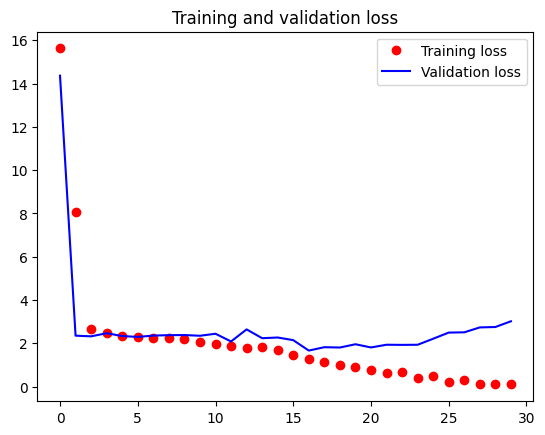

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Nacetni nauceneho modelu

In [5]:
# nacte trenovany model
model.load_weights('fingerprint_model.h5')

# Presnost

In [9]:
# vyhodnoceni presnosti modelu
accuracy = model.evaluate(X_val, y_val)[1]
print(f'Accuracy: {accuracy * 100:.2f}%')



1/1 [==============================] - 1s 1s/step - loss: 3.0189 - accuracy: 0.5625
Accuracy: 56.25%


# Test klasifikace

In [6]:
# funkce pro klasifikaci otisku s vyuzitim modelu
def classify_image(ax, image_path, model, label_encoder):
    # nacte obrazek
    img_base = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_base = cv2.resize(img_base, (X_train.shape[1], X_train.shape[2]))

    # normalizace pixelu
    img = img_base.reshape((1, img_base.shape[0], img_base.shape[1], 1))
    img = img / 255.0  
    
    # predikce tridy otisku
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    # prevod id tridy na puvodni label
    predicted_label = label_encoder.classes_[predicted_class]
    class_probabilities = prediction[0][predicted_class]

    print(f"Class: {predicted_label, class_probabilities} - {class_probabilities}")

    ax.set_title("%s: %.3f" % (predicted_label, class_probabilities))
    ax.imshow(img_base, cmap="gray")

1/1 [==============================] - 0s 138ms/step
Class: ('Finger_106', 0.98532504) - 0.985325038433075
1/1 [==============================] - 0s 133ms/step
Class: ('Finger_105', 0.33942822) - 0.33942821621894836
1/1 [==============================] - 0s 133ms/step
Class: ('Finger_109', 0.85660845) - 0.8566084504127502
1/1 [==============================] - 0s 135ms/step
Class: ('Finger_104', 0.9981279) - 0.9981278777122498


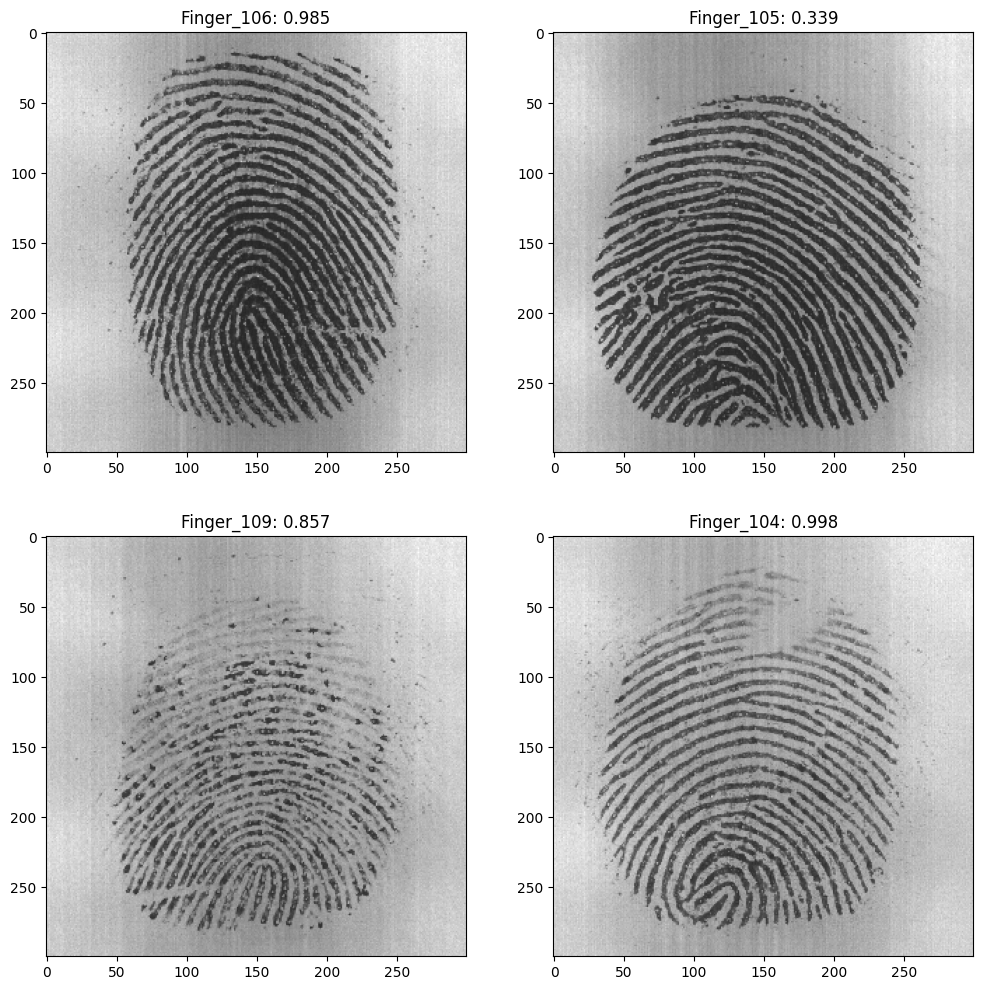

In [71]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

classify_image(axs[0][0], "dataset/Db3_b/106_4.tif", model, label_encoder)
classify_image(axs[0][1], "dataset/Db3_a/7_5.tif", model, label_encoder)
classify_image(axs[1][0], "dataset/Db3_b/109_8.tif", model, label_encoder)
classify_image(axs[1][1], "dataset/Db3_b/104_3.tif", model, label_encoder)

plt.show()

# GRAD CAM Aktivacni mapa

In [8]:
import matplotlib.cm as cm
from IPython.display import Image, display

def save_and_display_gradcam(img_path, heatmap, axs, cam_path="cam.jpg", alpha=0.5):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    axs.imshow(superimposed_img)

def make_gradcam_heatmap(model, img_path, axs, label_encoder, pred_index=None):
    # nacte obrazek
    img_base = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_base = cv2.resize(img_base, (X_train.shape[1], X_train.shape[2]))

    # normalizace pixelu
    img = img_base.reshape((1, img_base.shape[0], img_base.shape[1], 1))
    img = img / 255.0  

    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer("conv2d_2").output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    predicted_label = "None"
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        predicted_label = label_encoder.classes_[pred_index]
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)


    save_and_display_gradcam(img_path=img_path, heatmap=heatmap, axs=axs)
    axs.set_title(predicted_label)

    return heatmap.numpy()

C:\Users\Martin Krcma\AppData\Local\Temp\ipykernel_22464\401219116.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


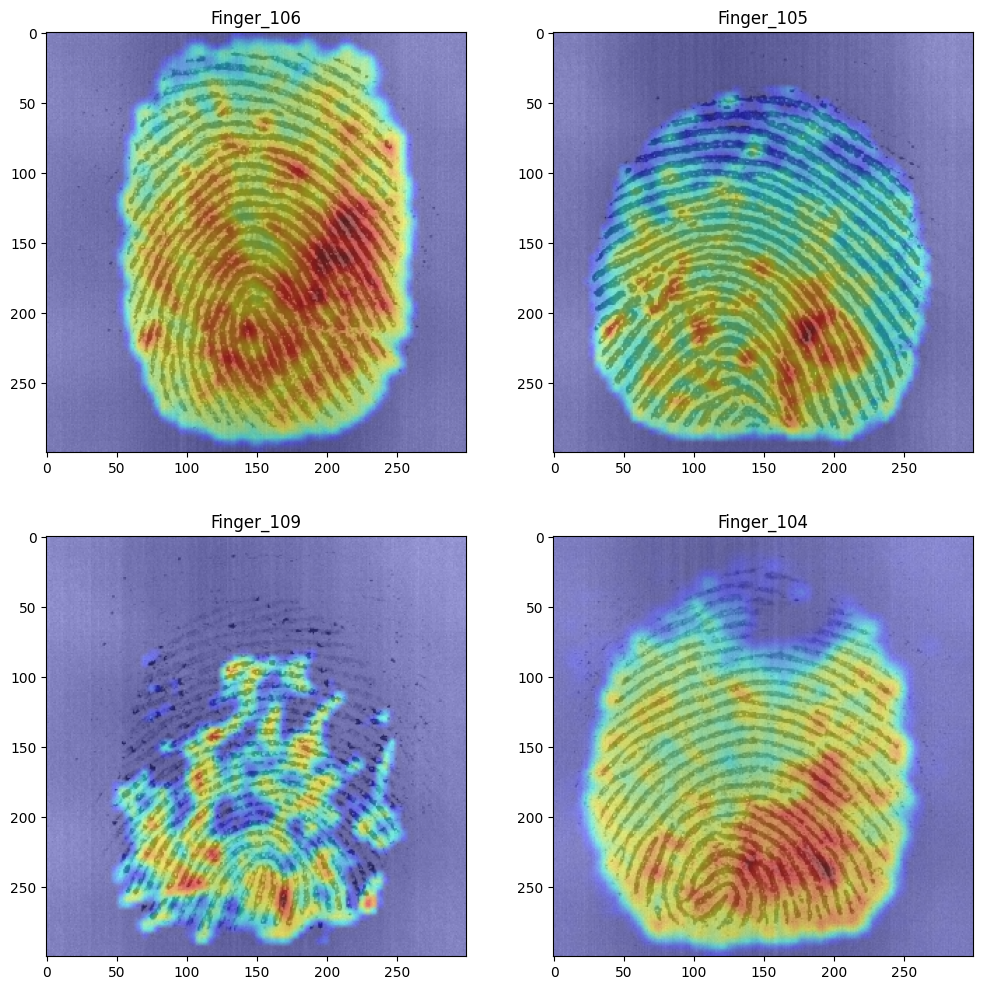

In [72]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

make_gradcam_heatmap(model, "dataset/Db3_b/106_4.tif", axs[0][0], label_encoder)
make_gradcam_heatmap(model, "dataset/Db3_a/7_5.tif", axs[0][1], label_encoder)
make_gradcam_heatmap(model, "dataset/Db3_b/109_8.tif", axs[1][0], label_encoder)
make_gradcam_heatmap(model, "dataset/Db3_b/104_3.tif", axs[1][1], label_encoder)

plt.show()